In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('bank.csv')

In [25]:
df.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [26]:
print("Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   fault      11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [27]:
df.duplicated().sum()

0

In [28]:
 df.isna().sum()

age          0
job          0
marital      0
education    0
fault        0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [29]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns

In [30]:
lb = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lb.fit_transform)

In [31]:
df.head()

,age,job,marital,education,fault,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


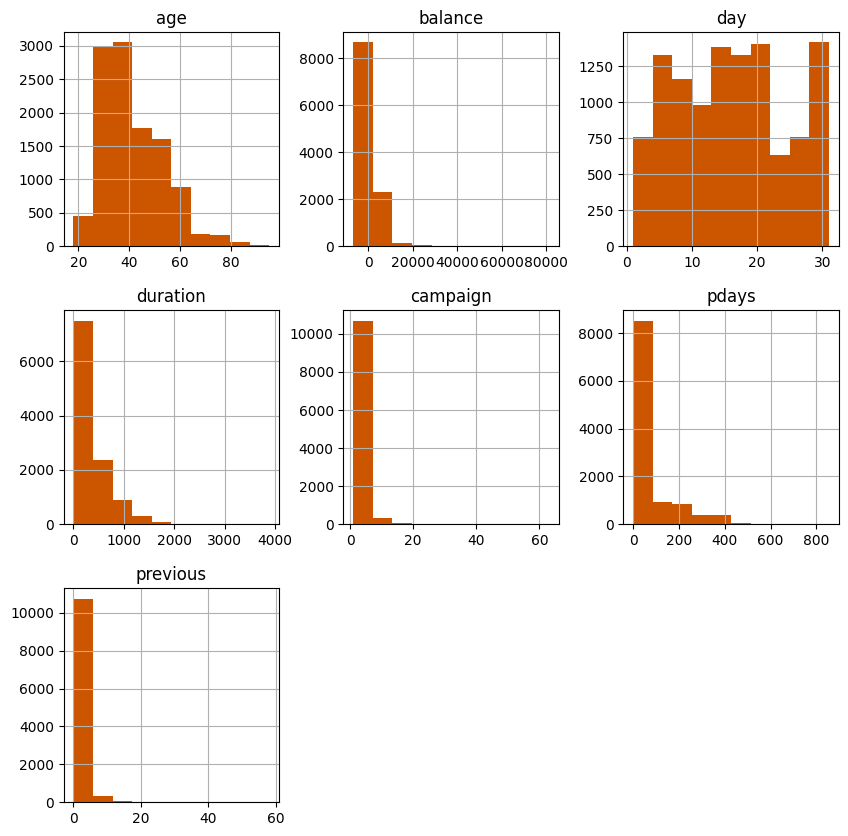

In [32]:
df[num_cols].hist(figsize=(10,10), color='#cc5500')
plt.show()

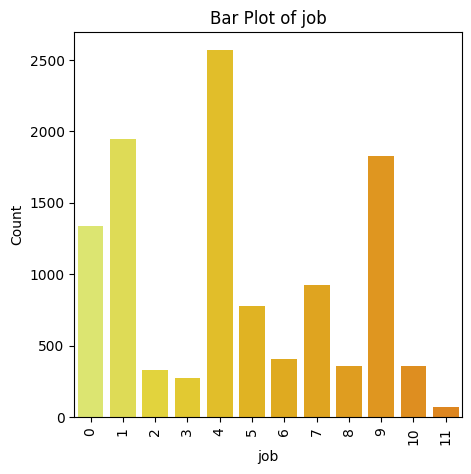

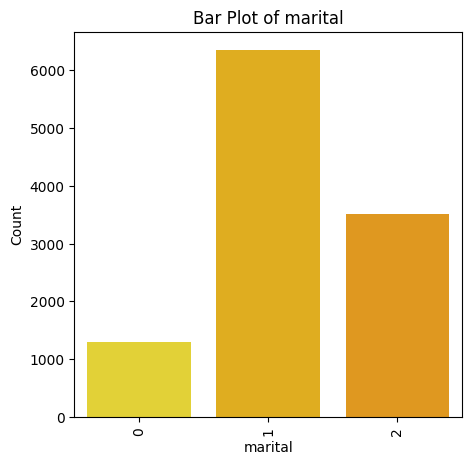

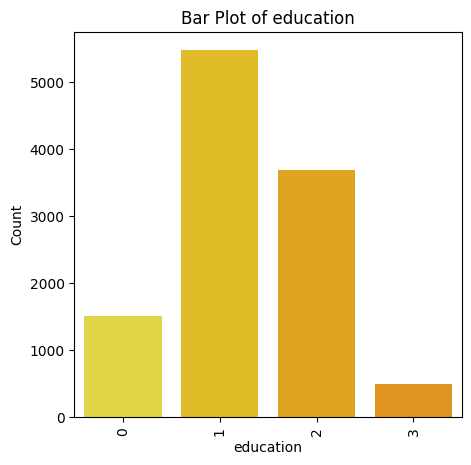

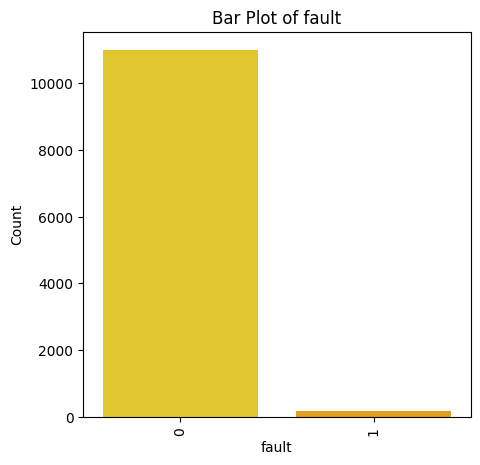

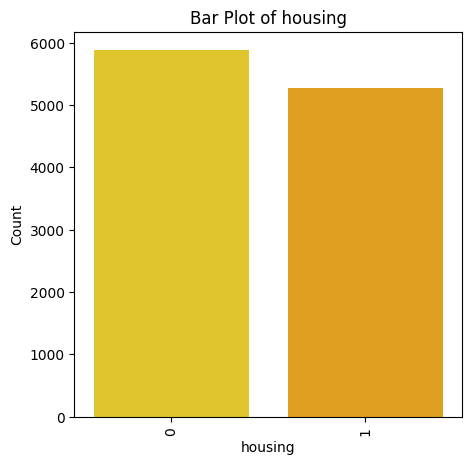

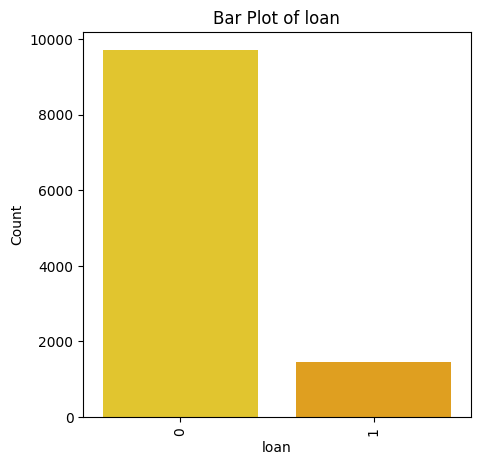

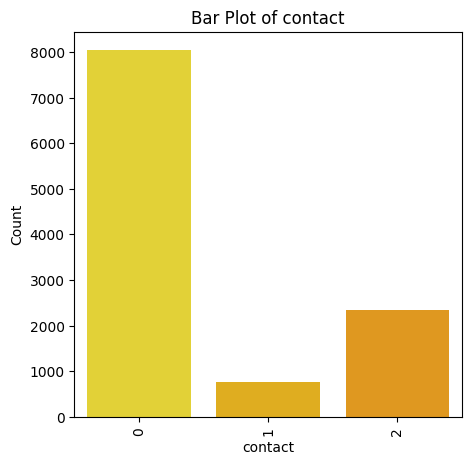

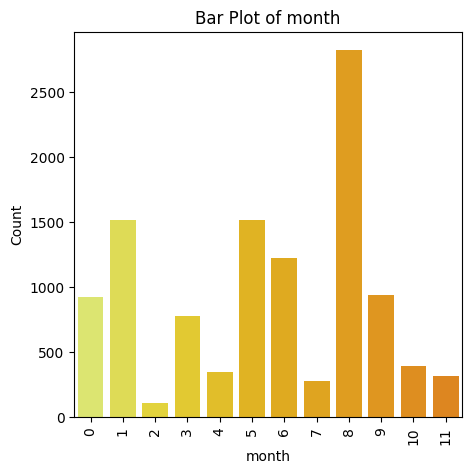

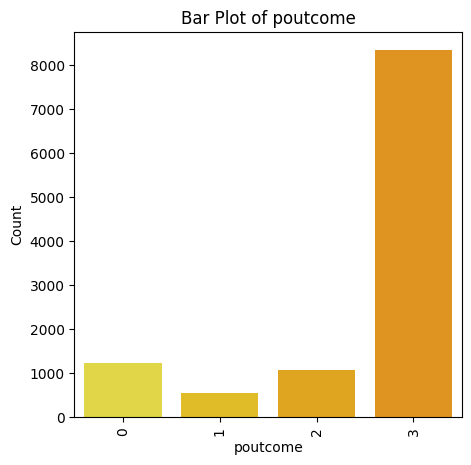

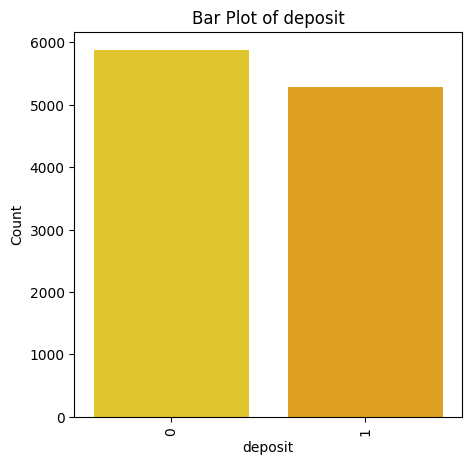

In [33]:
for feature in cat_cols:
        plt.figure(figsize=(5,5))
        sns.countplot(x=feature, data=df, palette='Wistia')
        plt.title(f'Bar Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()

In [36]:
def remove_outliers(df, column_names):
        for col in column_names:
             q1 = df[col].quantile(0.25)
             q3 = df[col].quantile(0.75)
             iqr = q3 - q1
             lower_bound = q1 - 1.5 * iqr
             upper_bound = q3 + 1.5 * iqr
             df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df

In [37]:
df = remove_outliers(df, ['age', 'duration', 'campaign'])

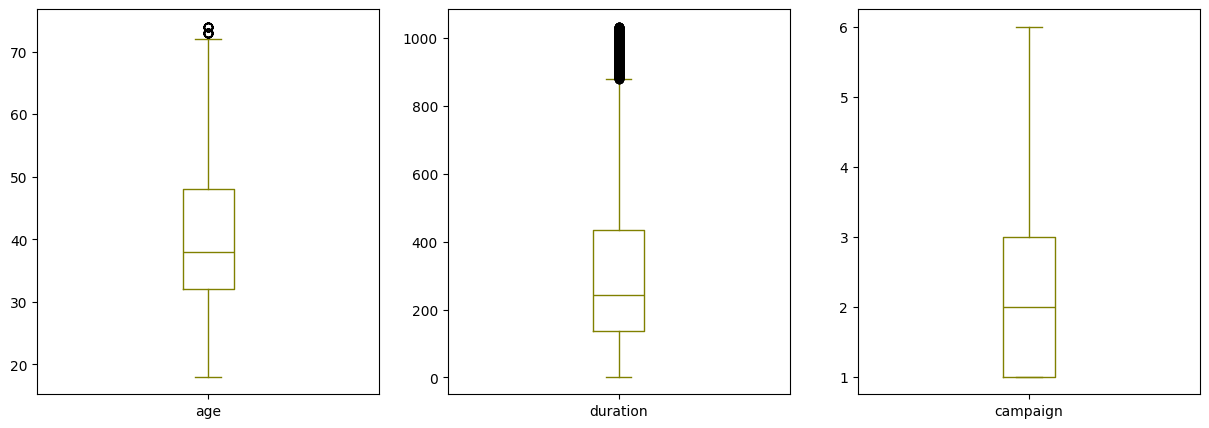

In [38]:
df[['age', 'duration', 'campaign']].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5), color='#808000')
plt.show()

In [39]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [42]:
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (7350, 16), Testing set shape: (2450, 16)


In [43]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [45]:
train_score_gini = dt_gini.score(X_train, y_train)
test_score_gini = dt_gini.score(X_test, y_test)

In [46]:
print(f"Training Score: {train_score_gini}, Testing Score: {test_score_gini}")

Training Score: 0.7850340136054422, Testing Score: 0.7779591836734694


In [48]:
y_pred_gini = dt_gini.predict(X_test)
        plt.figure(figsize=(15,10))\n",
        "plot_tree(dt_gini, feature_names=X.columns, class_names=['no', 'yes'], filled=True)\n",
        "plt.show()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

Confusion Matrix:
 [[965 359]
 [185 941]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.78      1324
           1       0.72      0.84      0.78      1126

    accuracy                           0.78      2450
   macro avg       0.78      0.78      0.78      2450
weighted avg       0.79      0.78      0.78      2450



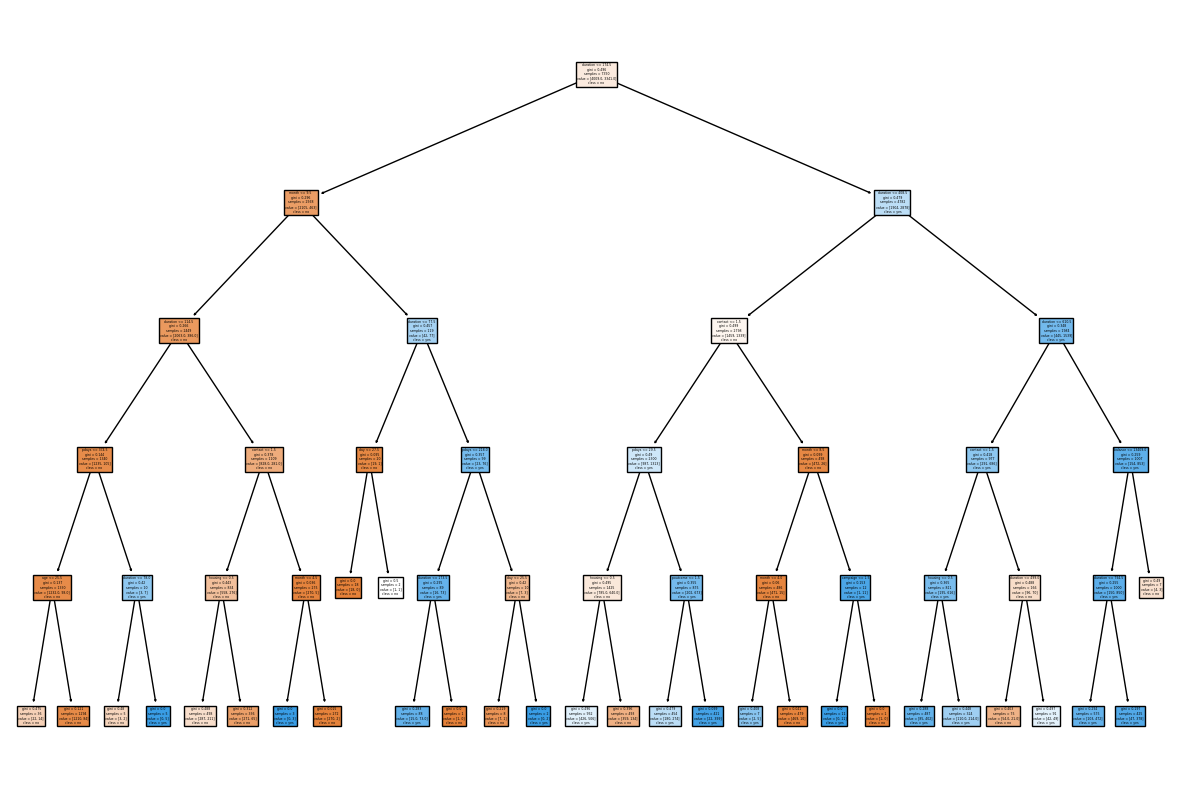

In [49]:
plt.figure(figsize=(15,10))
plot_tree(dt_gini, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()

Entropy-based Decision Tree
Confusion Matrix:
 [[1109  215]
 [ 378  748]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1324
           1       0.78      0.66      0.72      1126

    accuracy                           0.76      2450
   macro avg       0.76      0.75      0.75      2450
weighted avg       0.76      0.76      0.76      2450



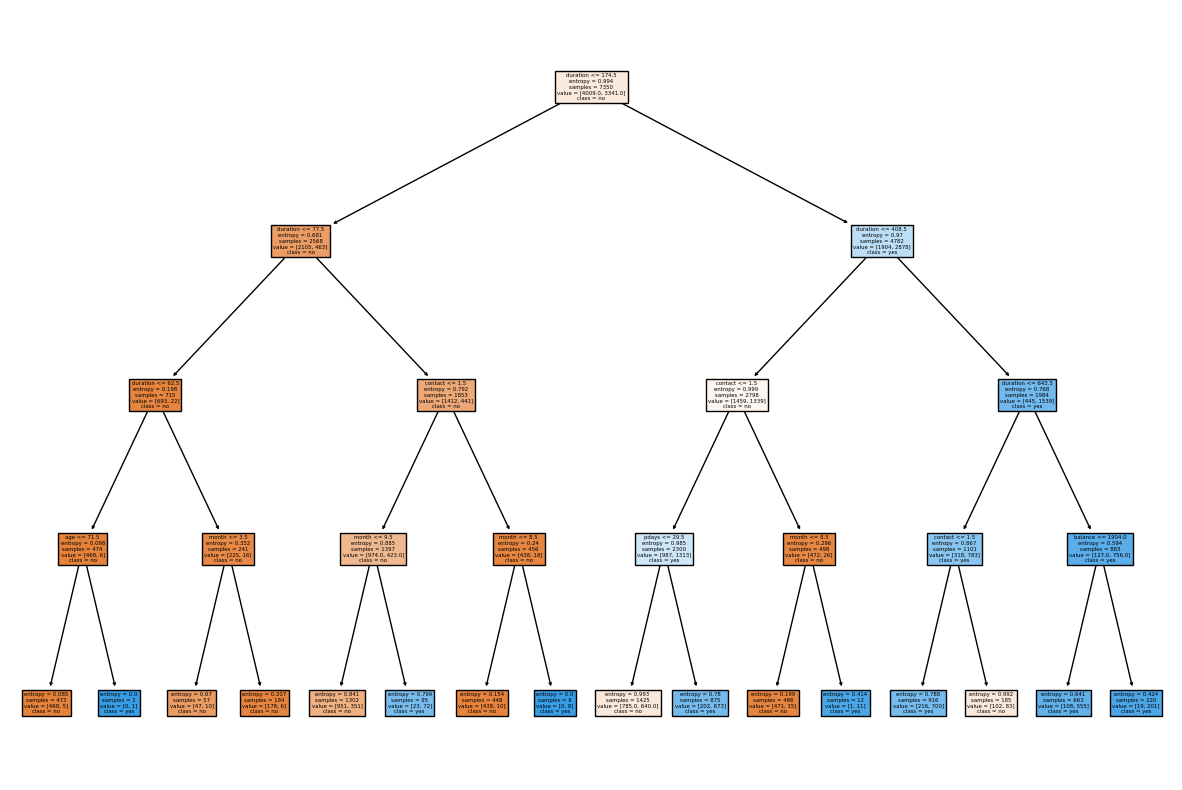

In [50]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt_entropy.fit(X_train, y_train)

        
y_pred_entropy = dt_entropy.predict(X_test)
print("Entropy-based Decision Tree")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

plt.figure(figsize=(15,10))
plot_tree(dt_entropy, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()